In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd drive/MyDrive/FDSML_/

/content/drive/MyDrive/FDSML_


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn.metrics import hinge_loss
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

## Lettura del dataset

In [5]:
data = pd.read_csv('TrainExpImp.csv')
print(data.shape)
diseaseList = np.empty((0,12))
with open('disease.txt') as f:
    lines = f.readlines()
    for el in lines:
      el = el.replace('\n', '')
      diseaseList = np.append(diseaseList, el)

(1912, 101)


In [6]:
X = data.to_numpy()
y = X[:, 100]
X = X[:, :100]

## Grid Search

In [ ]:
#Finding best parameters with Gridsearch
k_range = list(range(1, 101))
leaf_range= list(range(20, 51))
param_grid = dict(n_neighbors=k_range, leaf_size=leaf_range)
clf = KNeighborsClassifier(weights="uniform", metric="euclidean", algorithm='ball_tree')
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grd = GridSearchCV(clf, param_grid=param_grid, cv=cv, scoring='neg_log_loss')
grd.fit(X, y)
grd.best_params_

{'leaf_size': 20, 'n_neighbors': 88}

# Validazione con negative log loss

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8)
clf = KNeighborsClassifier(n_neighbors=88, weights="uniform", metric="euclidean", algorithm="ball_tree", leaf_size=20)
y_pred_score = cross_val_score(clf, X_train, y_train, cv=5, scoring='neg_log_loss')
print(y_pred_score)
print(f"Mean loss score: {np.mean(y_pred_score)}")

[-1.24778843 -1.07142822 -1.04630768 -1.38272044 -1.13708992]
Mean loss score: -1.1770669365781496


In [10]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 10), scorer=None):
    
    _, axes = plt.subplots(1, 3, figsize=(20, 5))
    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, return_times=True, scoring=scorer)
    if scorer=='neg_log_loss':
      train_scores = -train_scores
      test_scores = -test_scores
    else:
      train_scores = train_scores
      test_scores = test_scores 
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

## Validation curves

**Loss Curve**

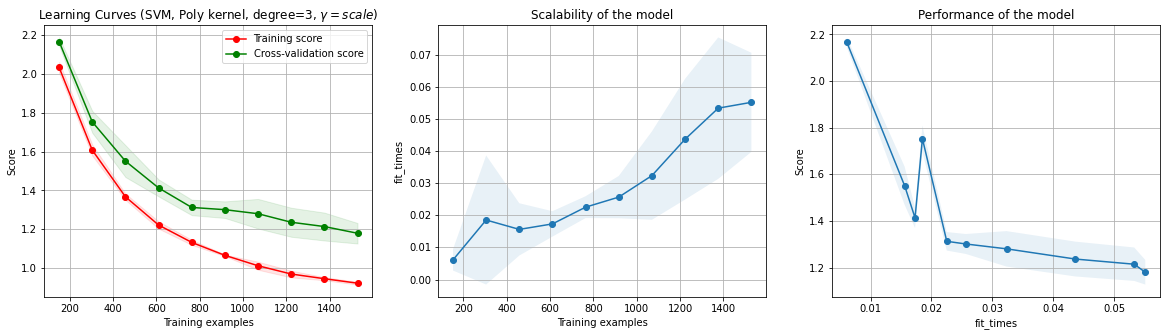

In [ ]:
title = r"Loss Curves (KNN, neighbours=88, leaf_size=20$)"
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
estimator = KNeighborsClassifier(n_neighbors=82, weights="uniform", metric="euclidean", algorithm="ball_tree", leaf_size=50)
plot_learning_curve(estimator, title, X_train, y_train, cv=cv, n_jobs=-1, scorer='neg_log_loss')
plt.show()

**Learning Curves**

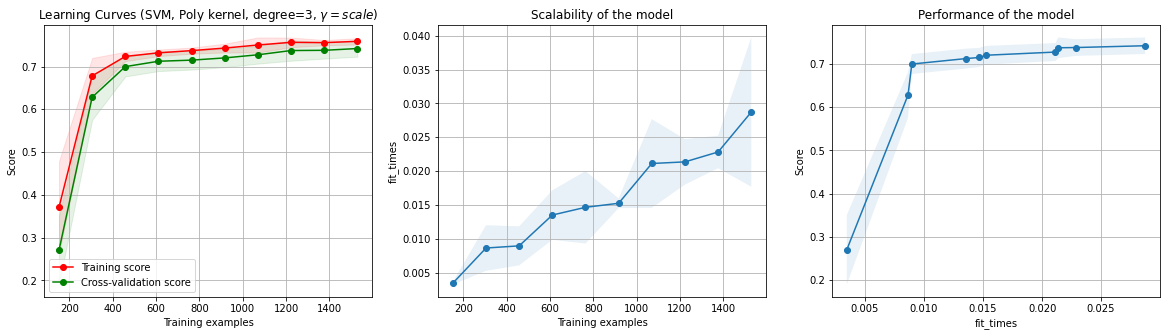

In [ ]:
title = r"Learning Curves (KNN, neighbours=88, leaf_size=20$)"
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
estimator = KNeighborsClassifier(n_neighbors=88, weights="uniform", metric="euclidean", algorithm="ball_tree", leaf_size=20)
plot_learning_curve(estimator, title, X_train, y_train, cv=cv, n_jobs=-1)
plt.show()

**Precision Curves**

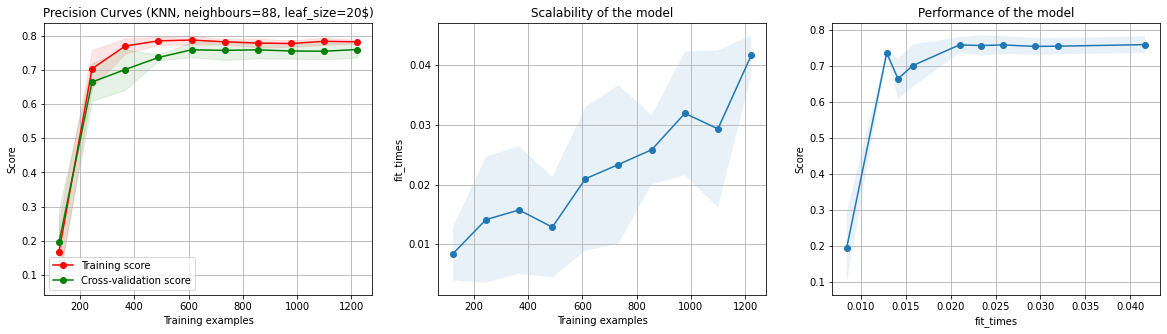

In [12]:
title = r"Precision Curves (KNN, neighbours=88, leaf_size=20$)"
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
estimator = KNeighborsClassifier(n_neighbors=88, weights="uniform", metric="euclidean", algorithm="ball_tree", leaf_size=20)
plot_learning_curve(estimator, title, X_train, y_train, cv=cv, n_jobs=-1, scorer=make_scorer(precision_score, average='macro'))
plt.show()

# Testing

accuracy: 0.7467362924281984 precision: 0.7772796140174189  recall: 0.7588090516841274


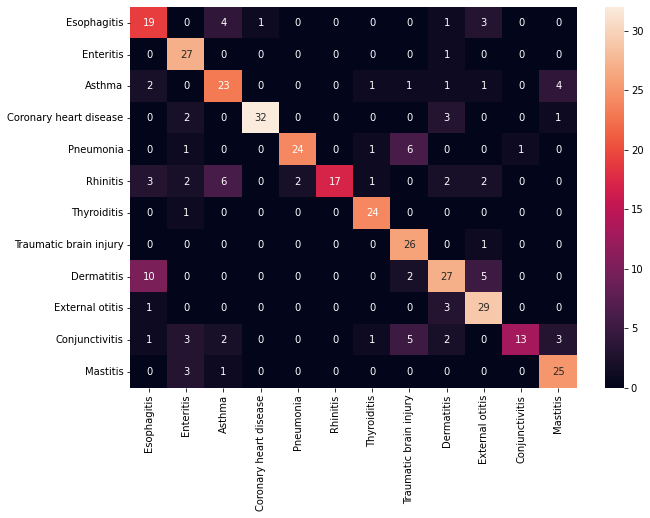

In [8]:
clf = KNeighborsClassifier(n_neighbors=88, weights="uniform", metric="euclidean", algorithm="ball_tree", leaf_size=20)
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)

accuracy = accuracy_score(y_test, predicted)
precision = precision_score(y_test, predicted, average="macro")
recall = recall_score(y_test, predicted, average="macro")
print(f"accuracy: {accuracy} precision: {precision}  recall: {recall}")

conf_mat = confusion_matrix(y_test, predicted)
df_cm = pd.DataFrame(conf_mat, index = [i for i in diseaseList], columns = [i for i in diseaseList])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)